In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [3]:
market_price = np.array([101.8137, 97.7066, 101.2414, 89.9751, 103.4012, 99.0074, 87.2097])
coupon = np.array([6.5, 3.25, 4.8, 1.5, 5, 4, 2])

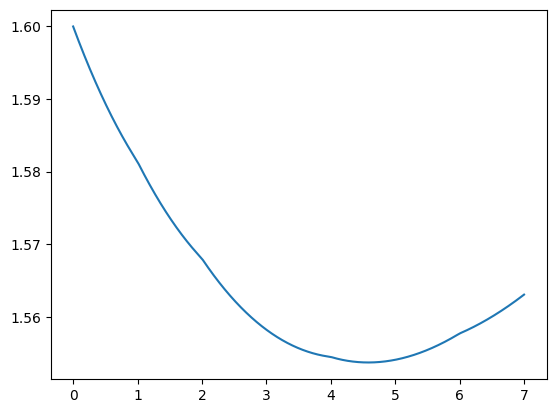

In [11]:
df0 = []
for i in range(coupon.shape[0]):
    sum = 0
    for j in range(0,len(df0)):
        sum += coupon[i]*df0[j]
    factor = (market_price[i]-sum)/(100+coupon[i])
    df0 += [factor]
df0 = [1] + df0
def df_calculator(t: float):
    if (t>len(df0)):
        return None
    if (int(t)==t):
        return df0[int(t)]
    t1 = math.floor(t)
    t2 = math.ceil(t)
    return math.exp(math.log(df0[t1])+((t-t1)/(t2-t1))*(math.log(df0[t2])-math.log(df0[t1])))
def instant(t):
    return 0.025+0.035*math.exp(-0.2*t)
def f_df_calculator(t:float):
    return math.exp(-quad(instant,0,t)[0])
def calculate(t):
    return 1.6*f_df_calculator(t)/df_calculator(t)
t = np.arange(0,7+0.0001,0.0001)
df = list(map(calculate,t))
plt.plot(t,df)
plt.show()
